In [1]:
from dataset import *
import pandas as pd

In [2]:
class LDA:
    def train(self,train_data,train_label):
        train_w=[]
        mi=[]
        Si=[np.zeros([train_data.shape[1],train_data.shape[1]])]*2
        data=pd.DataFrame(np.hstack([train_label,train_data]))
        data=data.sort_values(by=0,ascending=True)
        for b in set(train_label.T[0]):
            train_w.append(np.array(data[data[0]==b].iloc[:,1:]))
        for b in range(len(train_w)):
            mi.append(train_w[b].sum(axis=0)/train_w[b].shape[0])
            for c in train_w[0]:
                w=np.array([c-mi[b]]).T
                Si[b]=w.dot(w.T)+Si[b]
            Si[b]=Si[b]/train_data.shape[0]
        return np.linalg.inv(Si[0]+Si[1]).dot(mi[0]-mi[1])

In [3]:
train_data,train_label=data_build(dim=0,size=[100,100,2],label=('list',[1,-1]),sdv=[[-5,0],[5,0]])

In [4]:
data=pd.DataFrame(np.hstack([train_label,train_data]))

In [5]:
lda=LDA()
train_w=lda.train(train_data=train_data,train_label=train_label)

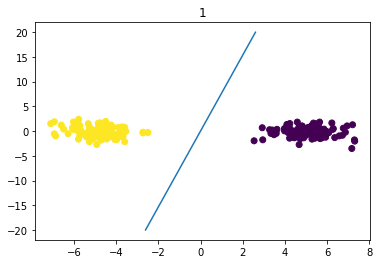

In [7]:
train_w
showpic(w=train_w,train_data=train_data,train_label=train_label,title=1,px=100)